## Phase 2 (Data Understanding): Age

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 4](https://data-science.training/kapitel-4/)
* Datum: 23.03.2023

Wir versuchen einen Weg zu finden, die fehlenden Werte des Attributs Alter zu schätzen.

Die folgenden Abbildungen erstellen wir mit Seaborn.

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Seaborn importieren [sns = seaborn name space, Samuel Norman Seaborn]
#  High-end Daten-Visualisierungen auf Basis von Matplot
#  https://seaborn.pydata.org/
import seaborn as sns
# Deutsches Zahlenformat
import locale
locale.setlocale(locale.LC_ALL, 'de')
# Warnungen unterdrücken
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Trainings- und Testdaten als Pandas Data Frame (df) aus CSV-Dateien laden
#  (KNIME: "CSV Reader")
df_train = pd.read_csv('../../data/titanic/original/train.csv')
df_test  = pd.read_csv('../../data/titanic/original/test.csv')

In [6]:
# Trainings- und Testdaten zusammenführen
#  (KNIME "Concatenate")
df = pd.concat([df_train, df_test], ignore_index=True)

In [7]:
# Datentypen automatisch konvertieren
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   Int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       1309 non-null   Int64  
 3   Name         1309 non-null   string 
 4   Sex          1309 non-null   string 
 5   Age          1046 non-null   Float64
 6   SibSp        1309 non-null   Int64  
 7   Parch        1309 non-null   Int64  
 8   Ticket       1309 non-null   string 
 9   Fare         1308 non-null   Float64
 10  Cabin        295 non-null    string 
 11  Embarked     1307 non-null   string 
dtypes: Float64(2), Int64(5), string(5)
memory usage: 131.8 KB


In [8]:
# Fehlende Werte prüfen
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Zwischenergebnis

Das Alter fehlt bei 263 Passagieren.

Wir probieren die folgenden Methoden zur Schätzung dieser Werte und sehen uns die Verteilungen an:

* Mittelwert (Mean)
* Median
* Interpolation


In [10]:
# Basis: Alter ohne fehlende Werte
age_0 = df['Age'].dropna().astype(float)
display(age_0)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1300     3.0
1302    37.0
1303    28.0
1305    39.0
1306    38.5
Name: Age, Length: 1046, dtype: float64

In [11]:
# Methode 1: Mittelwert (mean)
mean  = age_0.mean()
age_1 = df['Age'].fillna(mean).astype(float)
display(age_1)

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
          ...    
1304    29.881138
1305    39.000000
1306    38.500000
1307    29.881138
1308    29.881138
Name: Age, Length: 1309, dtype: float64

In [12]:
# Methode 2: Median (median)
median = age_0.median()
age_2 = df['Age'].fillna(median).astype(float)
display(age_2)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    28.0
1308    28.0
Name: Age, Length: 1309, dtype: float64

In [13]:
# Methode 3: Interpolation Version 1
#  Mittels "pad" werden die fehlenden Werte einfach mit bereits existierenden aufgefüllt
#  und zwar von den jeweiligen Datensätzen vorher (previous).
age_3 = df['Age'].interpolate(method='pad').astype(float)
display(age_3)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    28.0
1305    39.0
1306    38.5
1307    38.5
1308    38.5
Name: Age, Length: 1309, dtype: float64

In [14]:
# Methode 4: Interpolation Version 2
#  Mittels linearer Interpolation werden die fehlenden Werte aufgefüllt
#  und zwar von den Datensätzen vorher (previous) und nachher (next).
#  Das funktioniert hier aber nur getrennt für Trainings- und Testdaten
age_4a = df_train['Age'].interpolate()
age_4b = df_test['Age'].interpolate()
age_4 = pd.concat([age_4a, age_4b], ignore_index=True)
display(age_4)

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    33.5
1305    39.0
1306    38.5
1307    38.5
1308    38.5
Name: Age, Length: 1309, dtype: float64

In [15]:
# Seaborn: Allgemeine Einstellungen

# Schriftart setzen
sns.set(font = 'Arial')
# Schriftgröße setzen
sns.set(font_scale = 2.5)
# Achsen im deutschen Zahlenformat
plt.rcParams['axes.formatter.use_locale'] = True
# Bildgröße setzen (16 x 9)
sns.set(rc={'figure.figsize':(8, 4.5)})
# Weißes Gitter setzen
sns.set_style('whitegrid')

In [16]:
# Histogramm des Attributs Age VOR dem Schätzen der 263 fehlenden Werte
#plt.hist(age_0, bins=20)
#plt.title('Histogramm 0')
#plt.xlabel('Alter (Age)')
#plt.ylabel('Häufigkeit')
#plt.show()

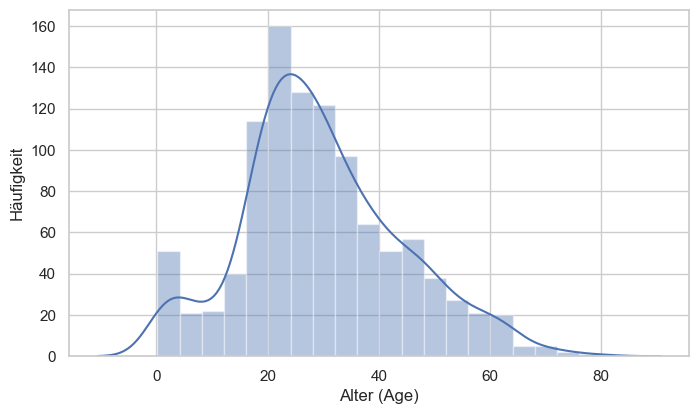

In [17]:
# Histplot zu Age
# stat = density, count, percent
sns.histplot(age_0, kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Age_0.svg', format='svg', dpi=1200, transparent=True)

In [18]:
# Histogramm des Attributs Age NACH dem Schätzen der 263 fehlenden Werte mit Mittelwert
#plt.hist(age_1, bins=20)
#plt.title('Histogramm 1')
#plt.xlabel('Alter (Age)')
#plt.ylabel('Häufigkeit')
#plt.show()

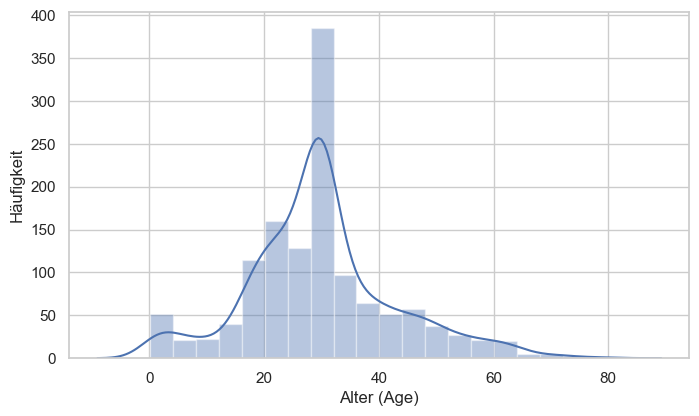

In [19]:
# Histplot zu Age
# stat = density, count, percent
sns.histplot(age_1, kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Age_1.svg', format='svg', dpi=1200, transparent=True)

In [20]:
# Histogramm des Attributs Age NACH dem Schätzen der 263 fehlenden Werte mit Median
#plt.hist(age_2, bins=20)
#plt.title('Histogramm 2')
#plt.xlabel('Alter (Age)')
#plt.ylabel('Häufigkeit')
#plt.show()

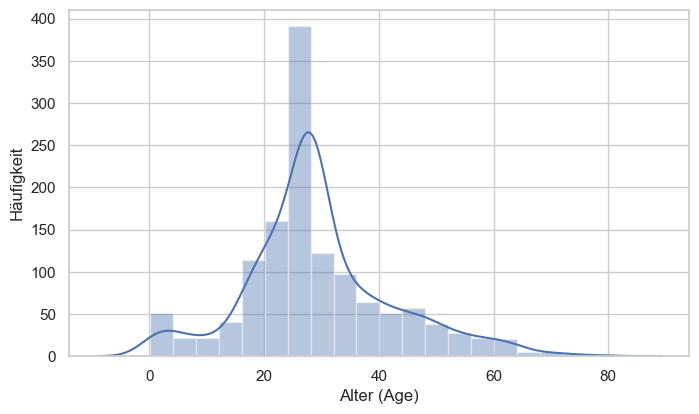

In [21]:
# Histplot zu Age
# stat = density, count, percent
sns.histplot(age_2, kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Age_2.svg', format='svg', dpi=1200, transparent=True)

In [22]:
# Histogramm des Attributs Age NACH dem Schätzen der 263 fehlenden Werte mit Interpolate 'Pad'
#plt.hist(age_3, bins=20)
#plt.title('Histogramm 3')
#plt.xlabel('Alter (Age)')
#plt.ylabel('Häufigkeit')
#plt.show()

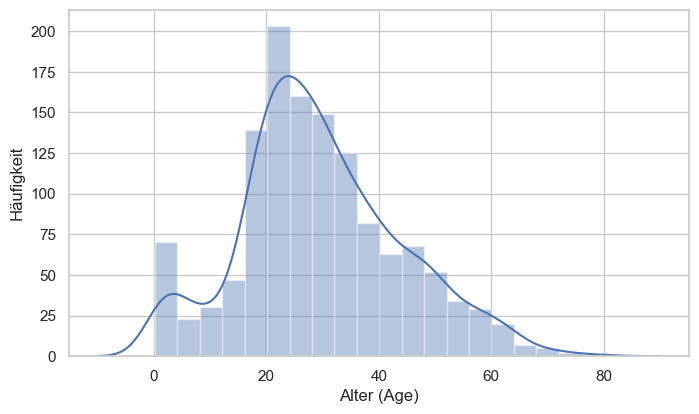

In [23]:
# Histplot zu Age
# stat = density, count, percent
sns.histplot(age_3, kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Age_3.svg', format='svg', dpi=1200, transparent=True)

In [24]:
# Histogramm des Attributs Age NACH dem Schätzen der 263 fehlenden Werte mit Interpolate
#plt.hist(age_4, bins=20)
#plt.title('Histogramm 4')
#plt.xlabel('Alter (Age)')
#plt.ylabel('Häufigkeit')
#plt.show()

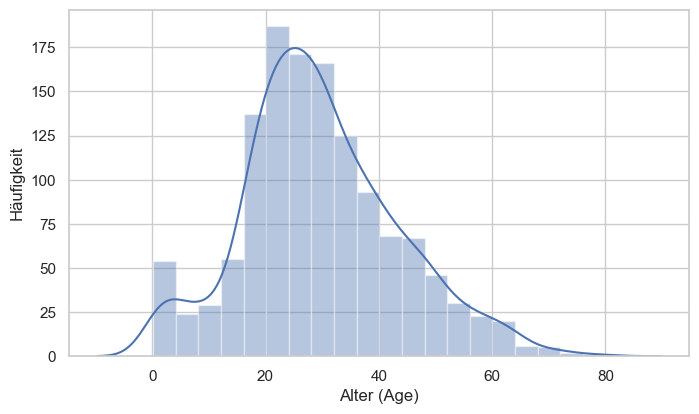

In [25]:
# Histplot zu Age
# stat = density, count, percent
sns.histplot(age_4, kde=True, stat='count', kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), bins=20)

# Achsen beschriften
plt.xlabel('Alter (Age)')
plt.ylabel('Häufigkeit')

# Grafik speichern
plt.savefig('../../figures/svg/Hist_Age_4.svg', format='svg', dpi=1200, transparent=True)

### Ergebnis

Die Schätzung für die fehlenden Werte des Attributs Alter ist schwer. Wenn wir den Mittelwert oder den Median hierfür benutzen, dann bekommen 263 Passagiere genau dieses Alter zugewiesen. Dadurch gibt es einen sehr hohen Peak an genau diesem Alter im Histogramm. D.h. wir ändern die Altersverteilung sehr stark. Die Interpolation mittels "Pad" dagegen führt schon zu einer ähnlichen Altersverteilung. Allerdings spielt hier der Zufall eine sehr große Rolle. Denn zum Schätzen der Werte wird der vorherige (ggf. auch der nachfolgende) Alterswert genommen, der vorhanden ist. Wenn die Tabelle mit den Passagieren anders sortiert ist, dann würden diese Schätzungen per Interpolation ganz anders aussehen. Also ist diese Möglichkeit auch noch nicht optimal. Gleiches gilt für das Schätzen der Werte mit Hilfe der linearen Interpolation. Bei dieser letzten Methode sieht die Altersverteilung der ursprünglichen am ähnlichsten.